In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [90]:
data = pd.read_csv("nhlstats.csv")

In [91]:
data.head()

,Unnamed: 0,Season,Age,Team_ID,Pos,GP,G,A,PTS,PIM,...,esA,ppA,shA,S,TOI,BLK,HIT,FOW,FOL,S_Pct
0,0,2015,27,DET,LW,71.0,23,21,44,72.0,...,15.0,6.0,0.0,154.0,1272.0,28.0,153.0,7.0,8.0,14.935065
1,1,2015,27,EDM,C,3.0,0,0,0,5.0,...,0.0,0.0,0.0,2.0,32.0,3.0,3.0,4.0,4.0,0.000000
2,2,2015,24,CBJ,C,3.0,0,0,0,4.0,...,0.0,0.0,0.0,0.0,19.0,0.0,2.0,0.0,0.0,NaN
3,3,2015,37,PIT,RW,70.0,1,6,7,44.0,...,5.0,0.0,1.0,51.0,682.0,29.0,183.0,17.0,23.0,1.960784
4,4,2015,24,COL,LW,1.0,0,1,1,0.0,...,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,2.0,0.000000


In [92]:
data = data.iloc[:,1:]

In [93]:
data.dtypes

Season         int64
Age            int64
Team_ID       object
Pos           object
GP           float64
G              int64
A              int64
PTS            int64
PIM          float64
PS           float64
PlusMinus    float64
esG          float64
ppG          float64
shG          float64
GWG          float64
esA          float64
ppA          float64
shA          float64
S            float64
TOI          float64
BLK          float64
HIT          float64
FOW          float64
FOL          float64
S_Pct        float64
dtype: object

In [94]:
data.isna().sum()

Season         0
Age            0
Team_ID        0
Pos            0
GP             0
G              0
A              0
PTS            0
PIM            0
PS             0
PlusMinus      0
esG            0
ppG            0
shG            0
GWG            0
esA            0
ppA            0
shA            0
S              0
TOI            0
BLK            0
HIT            0
FOW            0
FOL            0
S_Pct        208
dtype: int64

In [95]:
data["S_Pct"].fillna(0, inplace=True)

In [96]:
data.isna().sum()

Season       0
Age          0
Team_ID      0
Pos          0
GP           0
G            0
A            0
PTS          0
PIM          0
PS           0
PlusMinus    0
esG          0
ppG          0
shG          0
GWG          0
esA          0
ppA          0
shA          0
S            0
TOI          0
BLK          0
HIT          0
FOW          0
FOL          0
S_Pct        0
dtype: int64

In [97]:
data.describe()

,Season,Age,GP,G,A,PTS,PIM,PS,PlusMinus,esG,...,esA,ppA,shA,S,TOI,BLK,HIT,FOW,FOL,S_Pct
count,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,...,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000
mean,2018.553901,26.314369,43.492427,6.932926,11.682449,18.615375,20.847779,2.213160,-0.382971,5.326079,...,8.782996,2.698867,0.200585,74.478045,718.023291,33.941199,54.640193,71.212677,71.211404,7.556153
std,2.312947,4.254647,28.180575,8.547963,12.836047,20.196198,21.822803,2.670268,9.703081,6.248977,...,8.748502,4.845678,0.533248,67.631960,550.165514,37.211817,52.239388,166.142407,155.699438,7.793095
min,2015.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.200000,-47.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,23.000000,15.000000,1.000000,2.000000,3.000000,4.000000,0.100000,-5.000000,1.000000,...,1.000000,0.000000,0.000000,16.000000,188.000000,7.000000,14.000000,0.000000,0.000000,1.886792
50%,2019.000000,26.000000,48.000000,4.000000,7.000000,12.000000,15.000000,1.200000,-1.000000,3.000000,...,6.000000,0.000000,0.000000,59.000000,673.000000,22.000000,40.000000,1.000000,2.000000,6.779661
75%,2021.000000,29.000000,70.000000,10.000000,18.000000,29.000000,30.000000,3.600000,3.000000,8.000000,...,14.000000,3.000000,0.000000,116.000000,1174.000000,45.000000,80.000000,30.000000,37.000000,11.206897
max,2022.000000,45.000000,82.000000,60.000000,87.000000,128.000000,238.000000,15.300000,64.000000,44.000000,...,56.000000,34.000000,6.000000,398.000000,2378.000000,283.000000,382.000000,1273.000000,935.000000,100.000000


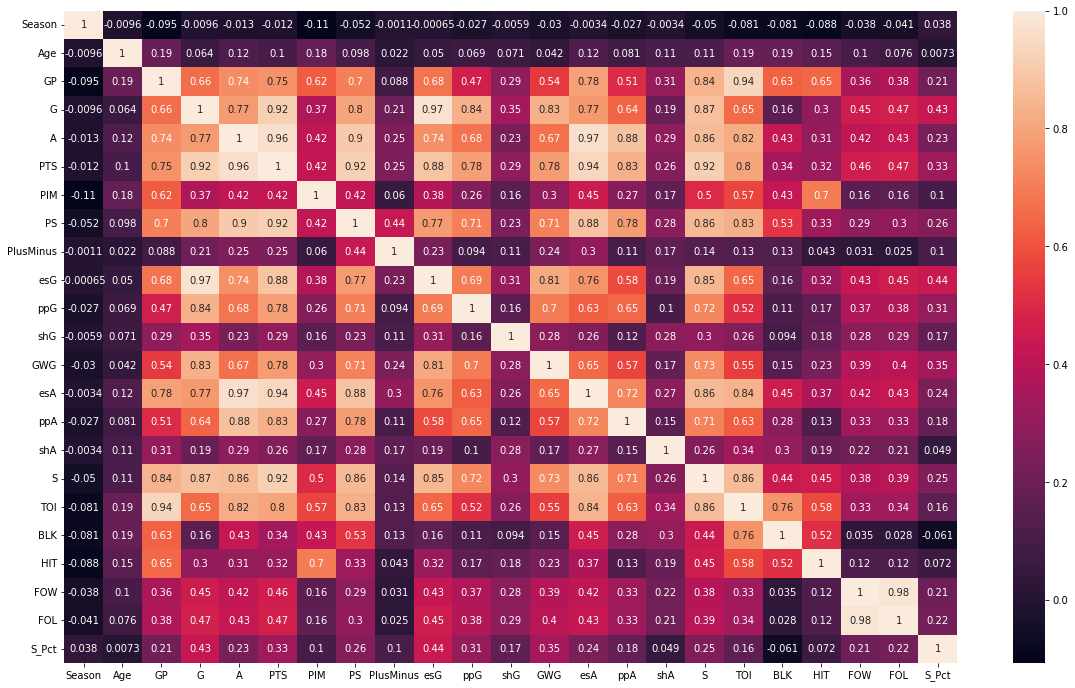

In [98]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [99]:
data = pd.get_dummies(data, columns=["Team_ID","Pos"])

In [100]:
data.dtypes.value_counts()

uint8      38
float64    18
int64       5
dtype: int64

In [101]:
X = data.drop(columns=["PTS","G","A","esG","ppG","shG","esA","ppA","shA"])
Y = data["PTS"]

In [102]:
print("Shape of X is: ", X.shape)
print("Shape of Y is: ", Y.shape)

Shape of X is:  (7857, 52)
Shape of Y is:  (7857,)


In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=15)

In [104]:
print("Shape of X-train is: ", X_train.shape)
print("Shape of X-test is: ", X_test.shape)
print("Shape of Y-train is: ", Y_train.shape)
print("Shape of Y-test is: ", Y_test.shape)

Shape of X-train is:  (6285, 52)
Shape of X-test is:  (1572, 52)
Shape of Y-train is:  (6285,)
Shape of Y-test is:  (1572,)


In [105]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression()

In [106]:
print("Intercept value of Y while X=0 is:",linreg.intercept_)

Intercept value of Y while X=0 is: 1650597570.5868974


In [107]:
print("Coefficient values:",linreg.coef_)

Coefficient values: [ 3.67035095e-01  6.19819406e-02  1.02145297e-01 -2.40543627e-04
  6.11400564e+00 -2.50651927e-01  2.12908677e-01  3.70010163e-02
  1.31140266e-03 -1.05926187e-01 -8.28301091e-03 -1.51495815e-03
  1.44030853e-02 -1.58541985e-02  1.56480053e+08  1.56480054e+08
  1.56480053e+08  1.56480053e+08  1.56480053e+08  1.56480054e+08
  1.56480054e+08  1.56480054e+08  1.56480055e+08  1.56480054e+08
  1.56480053e+08  1.56480055e+08  1.56480054e+08  1.56480053e+08
  1.56480054e+08  1.56480054e+08  1.56480053e+08  1.56480054e+08
  1.56480055e+08  1.56480055e+08  1.56480054e+08  1.56480055e+08
  1.56480055e+08  1.56480053e+08  1.56480054e+08  1.56480054e+08
  1.56480055e+08  1.56480055e+08  1.56480053e+08  1.56480054e+08
  1.56480055e+08  1.56480055e+08 -1.80707837e+09 -1.80707837e+09
 -1.80707837e+09 -1.80707837e+09 -1.80707837e+09 -1.80707836e+09]


In [108]:
Y_predtest = linreg.predict(X_test)

In [109]:
Y_predtest.reshape(-1,1)

array([[ 3.1744349 ],
       [42.58510733],
       [13.67834735],
       ...,
       [ 4.47807121],
       [ 5.17206025],
       [22.5663569 ]])

In [110]:
Y_test

6609      1
1073     31
6009     12
7080      0
7223      4
       ... 
2363     71
4318    110
6198      5
4932      4
3447     25
Name: PTS, Length: 1572, dtype: int64

In [111]:
actualpredicted = pd.DataFrame({"Actual":Y_test,"Predicted":Y_predtest})
round(actualpredicted,2)

,Actual,Predicted
6609,1,3.17
1073,31,42.59
6009,12,13.68
7080,0,1.68
7223,4,4.55
...,...,...
2363,71,71.17
4318,110,96.42
6198,5,4.48
4932,4,5.17


In [112]:
mae = mean_absolute_error(Y_test, Y_predtest)
mse = mean_squared_error(Y_test, Y_predtest)
rmse = np.sqrt(mse)

print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("Root mean squared error:", mse)

Mean absolute error: 2.6848381847219005
Mean squared error: 14.69254872197885
Root mean squared error: 14.69254872197885


In [113]:
print("Accuracy training dataset:",linreg.score(X_train, Y_train))
print("Accuracy testing dataset:",linreg.score(X_test, Y_test))

Accuracy training dataset: 0.9647547388087551
Accuracy testing dataset: 0.9653031694340297


In [114]:
x1 = sm.add_constant(X)


In [115]:
ols1 = sm.OLS(Y,x1).fit()

In [116]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     4297.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:42:35   Log-Likelihood:                -21599.
No. Observations:                7857   AIC:                         4.330e+04
Df Residuals:                    7806   BIC:                         4.365e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -621.6552     32.264    -19.268      